### Linear Regression / One Parameter

We find the `line` that best fits the data.  
It is one of the most `popular` tools in statistics.  

$ h(x) = ax + b $  
$ h_\theta = \theta_0 + \theta_1 x_1 $

h(x) = 1.3x + -18.0
h(80) = 86.0


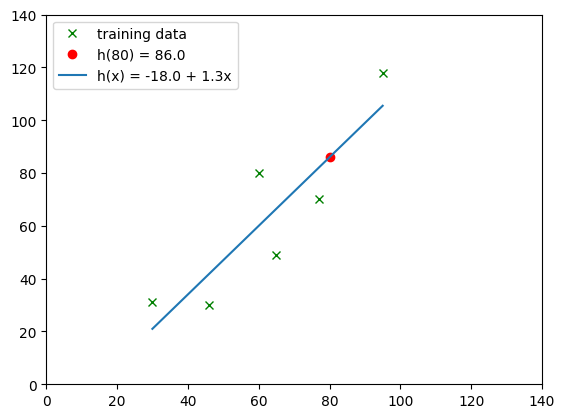

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Training Dataset
X = np.array([30, 46, 60, 65, 77, 95]).reshape(6,1)
Y = np.array([31, 30, 80, 49, 70, 118])

# Learn a prediction function
r = LinearRegression().fit(X, Y)
a = r.coef_[0].round(1)
b = r.intercept_.round(1)

# Predict unknown
x1 = 80
y1 = a*x1 + b

print(f'h(x) = {a}x + {b}')
print(f'h({x1}) = {y1}')

# Draw graphics
fig, ax = plt.subplots()
plt.ylim(0, 140)
plt.xlim(0, 140)

ax.plot(X,  Y,  'x', color='g', label='training data')      # dataset points
ax.plot(x1, y1, 'o', color='r', label=f'h({x1}) = {y1}')    # unknown point
ax.plot(X, a*X + b,  label=f'h(x) = {b} + {a}x')            # function line

plt.legend()
plt.show()

### Two Variables

Lets predict the `CO2` emission of a car based on the size of the engine.  
With multiple regression we can throw in `more` variables, like the weight of the car.  
This will make the prediction more `accurate`.  

$ h(x) = ax + by + c $  
$ h_\theta = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

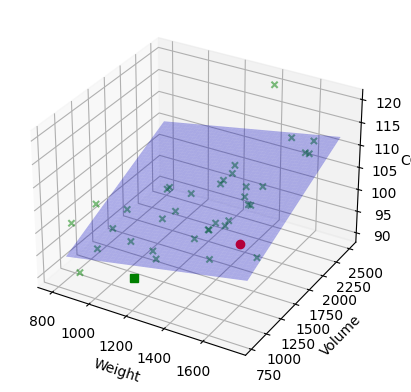

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Training Dataset
with open('data/cars.csv') as file:
    df = pd.read_csv(file)
    X = df[[
        'Weight',
        'Volume',
    ]].values
    y = df['CO2'].values

# Learn a prediction function
r = LinearRegression().fit(X, y) 

# Draw surface
fig = plt.figure()
Ax, Ay = np.meshgrid(
    np.linspace(df.Weight.min(), df.Weight.max(), 100),
    np.linspace(df.Volume.min(), df.Volume.max(), 100)
)
onlyX = pd.DataFrame({'Weight': Ax.ravel(), 'Volume': Ay.ravel()})
fittedY = r.predict(onlyX)
fittedY = np.array(fittedY)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='g', marker='x', alpha=0.5)
ax.plot_surface(Ax, Ay, fittedY.reshape(Ax.shape), color='b', alpha=0.3)
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

# Predictions
X1 = [1600, 1252]    # Honda Civic, 1600, 1252 / CO2: 94
y1 = r.predict([X1]) # CO2: 101.5

X2 = [1200, 780]     # Unknown car
y2 = r.predict([X2]) # CO2: 94.8

print(df, "\n")
print("Honda Civic, 1600, 1252 / CO2:", y1.round(1).item())
print("Unknow car, 1200, 780 / CO2:", y2.round(1).item())

ax.plot(X1[0], X1[1], y1[0], 'o', color='r')
ax.plot(X2[0], X2[1], y2[0], 's', color='g')

plt.show()